## Project 3 - Luxury Handbag Auction Sales 
### Interactive Visualization for Christie's March 6 2025 Handbag Auction Sale March 31 2025

In [506]:
# Uploading Libraries

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import altair as alt
import sqlite3


## PART 1 : Importing, reading, cleaning, adjusting and saving the CSV file.

In [507]:
# Import and read csv file 
df = pd.read_csv("../Project3-Luxurybags/Christies Hong Kong March 2025 Cleaned .csv")
# Display Dataframe
df


,Lot,Description,Brand,Type (All Lots),Year,Color,Leather,Hardware,Estimate (USD),Price Realized (USD)
0,1,LIME EVERCOLOR LEATHER MINI ROULIS WITH PALLAD...,HERMÈS,Mini Roulis,2022,Green,Evercolor,Palladium,"5,100−7,700",6100
1,2,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Kelly 32, Limited Edition",2011,Yellow,Epsom,Palladium,"7,700−12,800",9700
2,3,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Birkin 35, Limited Edition",2011,Yellow,Epsom,Palladium,"7,700−12,800",12100
3,4,SHINY MIMOSA NILOTICUS LIZARD SMALL CONSTANCE ...,HERMÈS,Constance Wallet,2011,Yellow,Lizard,Palladium,"2,600−3,800",2300
4,5,NAPLES YELLOW EPSOM LEATHER CONSTANCE TO GO,HERMÈS,Constance To Go,2023,Yellow,Epsom,Gold,"5,100−7,700",5600
...,...,...,...,...,...,...,...,...,...,...
237,254,LIMITED EDITION PAINTED PUMPKIN MONOGRAM KEEPA...,LOUIS VUITTON,"Keepall Bandoulière 45, Limited Edition",2023,Multi Color,Canvas,Gold,"2,600−3,600",4800
238,256,LIMITED EDITION BLACK TAURILLON LEATHER INFINI...,LOUIS VUITTON,"Christopher Backpack MM, Limited Edition",2023,Black,Taurillon,Black,"3,800−5,100",3500
239,257,ABSOLUTE BLACK MONOGRAM TAURILLON LEATHER KEEP...,LOUIS VUITTON,Keepall Bandoulière 50,2019,Black,Taurillon,Black & Orange,"2,600−3,600",4200
240,258,LIMITED EDITION BLACK EMPREINTE LEATHER TOTE B...,LOUIS VUITTON,"Tote Bag, Limited Edition",2008,Black,Empreinte,Black,"3,800−5,100",4800


In [508]:
# Extract Info on Data frame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Lot                   242 non-null    int64 
 1   Description           242 non-null    object
 2   Brand                 242 non-null    object
 3   Type (All Lots)       242 non-null    object
 4   Year                  242 non-null    int64 
 5   Color                 242 non-null    object
 6   Leather               242 non-null    object
 7   Hardware              242 non-null    object
 8   Estimate (USD)        242 non-null    object
 9   Price Realized (USD)  242 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 19.0+ KB
None


In [509]:
# Rename Type (All Lots) to Type
df.rename(columns={'Type (All Lots)': 'Type'}, inplace=True)
# Display Dataframe
df


,Lot,Description,Brand,Type,Year,Color,Leather,Hardware,Estimate (USD),Price Realized (USD)
0,1,LIME EVERCOLOR LEATHER MINI ROULIS WITH PALLAD...,HERMÈS,Mini Roulis,2022,Green,Evercolor,Palladium,"5,100−7,700",6100
1,2,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Kelly 32, Limited Edition",2011,Yellow,Epsom,Palladium,"7,700−12,800",9700
2,3,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Birkin 35, Limited Edition",2011,Yellow,Epsom,Palladium,"7,700−12,800",12100
3,4,SHINY MIMOSA NILOTICUS LIZARD SMALL CONSTANCE ...,HERMÈS,Constance Wallet,2011,Yellow,Lizard,Palladium,"2,600−3,800",2300
4,5,NAPLES YELLOW EPSOM LEATHER CONSTANCE TO GO,HERMÈS,Constance To Go,2023,Yellow,Epsom,Gold,"5,100−7,700",5600
...,...,...,...,...,...,...,...,...,...,...
237,254,LIMITED EDITION PAINTED PUMPKIN MONOGRAM KEEPA...,LOUIS VUITTON,"Keepall Bandoulière 45, Limited Edition",2023,Multi Color,Canvas,Gold,"2,600−3,600",4800
238,256,LIMITED EDITION BLACK TAURILLON LEATHER INFINI...,LOUIS VUITTON,"Christopher Backpack MM, Limited Edition",2023,Black,Taurillon,Black,"3,800−5,100",3500
239,257,ABSOLUTE BLACK MONOGRAM TAURILLON LEATHER KEEP...,LOUIS VUITTON,Keepall Bandoulière 50,2019,Black,Taurillon,Black & Orange,"2,600−3,600",4200
240,258,LIMITED EDITION BLACK EMPREINTE LEATHER TOTE B...,LOUIS VUITTON,"Tote Bag, Limited Edition",2008,Black,Empreinte,Black,"3,800−5,100",4800


In [510]:
# Reset the Index making sure it starts at 1 instead of 0
df = df.reset_index(drop=True)  # Reset index and drop the old one
df.index = df.index + 1  # Start at 1
# Display Dataframe
df

,Lot,Description,Brand,Type,Year,Color,Leather,Hardware,Estimate (USD),Price Realized (USD)
1,1,LIME EVERCOLOR LEATHER MINI ROULIS WITH PALLAD...,HERMÈS,Mini Roulis,2022,Green,Evercolor,Palladium,"5,100−7,700",6100
2,2,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Kelly 32, Limited Edition",2011,Yellow,Epsom,Palladium,"7,700−12,800",9700
3,3,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Birkin 35, Limited Edition",2011,Yellow,Epsom,Palladium,"7,700−12,800",12100
4,4,SHINY MIMOSA NILOTICUS LIZARD SMALL CONSTANCE ...,HERMÈS,Constance Wallet,2011,Yellow,Lizard,Palladium,"2,600−3,800",2300
5,5,NAPLES YELLOW EPSOM LEATHER CONSTANCE TO GO,HERMÈS,Constance To Go,2023,Yellow,Epsom,Gold,"5,100−7,700",5600
...,...,...,...,...,...,...,...,...,...,...
238,254,LIMITED EDITION PAINTED PUMPKIN MONOGRAM KEEPA...,LOUIS VUITTON,"Keepall Bandoulière 45, Limited Edition",2023,Multi Color,Canvas,Gold,"2,600−3,600",4800
239,256,LIMITED EDITION BLACK TAURILLON LEATHER INFINI...,LOUIS VUITTON,"Christopher Backpack MM, Limited Edition",2023,Black,Taurillon,Black,"3,800−5,100",3500
240,257,ABSOLUTE BLACK MONOGRAM TAURILLON LEATHER KEEP...,LOUIS VUITTON,Keepall Bandoulière 50,2019,Black,Taurillon,Black & Orange,"2,600−3,600",4200
241,258,LIMITED EDITION BLACK EMPREINTE LEATHER TOTE B...,LOUIS VUITTON,"Tote Bag, Limited Edition",2008,Black,Empreinte,Black,"3,800−5,100",4800


In [511]:
# Split 'Estimate (USD)' into 'Lower Estimate' & 'Higher Estimate'
# Ensure consistent separator and remove commas
df["Estimate (USD)"] = df["Estimate (USD)"].str.replace(",", "", regex=True)
df[["Lower Estimate (USD)", "Higher Estimate (USD)"]] = df["Estimate (USD)"].str.split("−", expand=True)

# Convert to numeric instead of object
df["Lower Estimate (USD)"] = pd.to_numeric(df["Lower Estimate (USD)"])
df["Higher Estimate (USD)"] = pd.to_numeric(df["Higher Estimate (USD)"])

# Show results
df

,Lot,Description,Brand,Type,Year,Color,Leather,Hardware,Estimate (USD),Price Realized (USD),Lower Estimate (USD),Higher Estimate (USD)
1,1,LIME EVERCOLOR LEATHER MINI ROULIS WITH PALLAD...,HERMÈS,Mini Roulis,2022,Green,Evercolor,Palladium,5100−7700,6100,5100,7700
2,2,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Kelly 32, Limited Edition",2011,Yellow,Epsom,Palladium,7700−12800,9700,7700,12800
3,3,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Birkin 35, Limited Edition",2011,Yellow,Epsom,Palladium,7700−12800,12100,7700,12800
4,4,SHINY MIMOSA NILOTICUS LIZARD SMALL CONSTANCE ...,HERMÈS,Constance Wallet,2011,Yellow,Lizard,Palladium,2600−3800,2300,2600,3800
5,5,NAPLES YELLOW EPSOM LEATHER CONSTANCE TO GO,HERMÈS,Constance To Go,2023,Yellow,Epsom,Gold,5100−7700,5600,5100,7700
...,...,...,...,...,...,...,...,...,...,...,...,...
238,254,LIMITED EDITION PAINTED PUMPKIN MONOGRAM KEEPA...,LOUIS VUITTON,"Keepall Bandoulière 45, Limited Edition",2023,Multi Color,Canvas,Gold,2600−3600,4800,2600,3600
239,256,LIMITED EDITION BLACK TAURILLON LEATHER INFINI...,LOUIS VUITTON,"Christopher Backpack MM, Limited Edition",2023,Black,Taurillon,Black,3800−5100,3500,3800,5100
240,257,ABSOLUTE BLACK MONOGRAM TAURILLON LEATHER KEEP...,LOUIS VUITTON,Keepall Bandoulière 50,2019,Black,Taurillon,Black & Orange,2600−3600,4200,2600,3600
241,258,LIMITED EDITION BLACK EMPREINTE LEATHER TOTE B...,LOUIS VUITTON,"Tote Bag, Limited Edition",2008,Black,Empreinte,Black,3800−5100,4800,3800,5100


In [512]:
# print new data info after adjustments were made 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 1 to 242
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Lot                    242 non-null    int64 
 1   Description            242 non-null    object
 2   Brand                  242 non-null    object
 3   Type                   242 non-null    object
 4   Year                   242 non-null    int64 
 5   Color                  242 non-null    object
 6   Leather                242 non-null    object
 7   Hardware               242 non-null    object
 8   Estimate (USD)         242 non-null    object
 9   Price Realized (USD)   242 non-null    int64 
 10  Lower Estimate (USD)   242 non-null    int64 
 11  Higher Estimate (USD)  242 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 22.8+ KB
None


In [513]:
# Reordering columns to place the price realized column at the end
columns_order = [
    "Lot", "Description", "Brand", "Type", "Year", "Color", "Leather", "Hardware",
    "Estimate (USD)", "Lower Estimate (USD)", "Higher Estimate (USD)", "Price Realized (USD)"
]

# Apply the new column order
df = df[columns_order]

# display to verify
df


,Lot,Description,Brand,Type,Year,Color,Leather,Hardware,Estimate (USD),Lower Estimate (USD),Higher Estimate (USD),Price Realized (USD)
1,1,LIME EVERCOLOR LEATHER MINI ROULIS WITH PALLAD...,HERMÈS,Mini Roulis,2022,Green,Evercolor,Palladium,5100−7700,5100,7700,6100
2,2,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Kelly 32, Limited Edition",2011,Yellow,Epsom,Palladium,7700−12800,7700,12800,9700
3,3,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Birkin 35, Limited Edition",2011,Yellow,Epsom,Palladium,7700−12800,7700,12800,12100
4,4,SHINY MIMOSA NILOTICUS LIZARD SMALL CONSTANCE ...,HERMÈS,Constance Wallet,2011,Yellow,Lizard,Palladium,2600−3800,2600,3800,2300
5,5,NAPLES YELLOW EPSOM LEATHER CONSTANCE TO GO,HERMÈS,Constance To Go,2023,Yellow,Epsom,Gold,5100−7700,5100,7700,5600
...,...,...,...,...,...,...,...,...,...,...,...,...
238,254,LIMITED EDITION PAINTED PUMPKIN MONOGRAM KEEPA...,LOUIS VUITTON,"Keepall Bandoulière 45, Limited Edition",2023,Multi Color,Canvas,Gold,2600−3600,2600,3600,4800
239,256,LIMITED EDITION BLACK TAURILLON LEATHER INFINI...,LOUIS VUITTON,"Christopher Backpack MM, Limited Edition",2023,Black,Taurillon,Black,3800−5100,3800,5100,3500
240,257,ABSOLUTE BLACK MONOGRAM TAURILLON LEATHER KEEP...,LOUIS VUITTON,Keepall Bandoulière 50,2019,Black,Taurillon,Black & Orange,2600−3600,2600,3600,4200
241,258,LIMITED EDITION BLACK EMPREINTE LEATHER TOTE B...,LOUIS VUITTON,"Tote Bag, Limited Edition",2008,Black,Empreinte,Black,3800−5100,3800,5100,4800


In [514]:
# Add a new column categorizing price based on how sale results compare to estimates
def categorize_price(row):
    if pd.isna(row['Price Realized (USD)']) or row['Price Realized (USD)'] == 0:
        return 'No Sale' #If Price Realized is zero or nit mentioned display "No Sale"
    elif row['Price Realized (USD)'] < row['Lower Estimate (USD)']:
        return 'Below Estimate' #If Price Realized is under the lower estimate display "Below Estimate"
    elif row['Price Realized (USD)'] > row['Higher Estimate (USD)']:
        return 'Above Estimate' #If Price Realized is above the lower estimate display "Above Estimate"
    else:
        return 'Within Estimate' #If Price Realized is within the estimates display "Within Estimate"

df['Price Category'] = df.apply(categorize_price, axis=1)
# display dataframe
df


/var/folders/1m/7n3mw1wj3ml7gf8rmsjswdrr0000gn/T/ipykernel_2031/708171887.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Lot,Description,Brand,Type,Year,Color,Leather,Hardware,Estimate (USD),Lower Estimate (USD),Higher Estimate (USD),Price Realized (USD),Price Category
1,1,LIME EVERCOLOR LEATHER MINI ROULIS WITH PALLAD...,HERMÈS,Mini Roulis,2022,Green,Evercolor,Palladium,5100−7700,5100,7700,6100,Within Estimate
2,2,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Kelly 32, Limited Edition",2011,Yellow,Epsom,Palladium,7700−12800,7700,12800,9700,Within Estimate
3,3,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Birkin 35, Limited Edition",2011,Yellow,Epsom,Palladium,7700−12800,7700,12800,12100,Within Estimate
4,4,SHINY MIMOSA NILOTICUS LIZARD SMALL CONSTANCE ...,HERMÈS,Constance Wallet,2011,Yellow,Lizard,Palladium,2600−3800,2600,3800,2300,Below Estimate
5,5,NAPLES YELLOW EPSOM LEATHER CONSTANCE TO GO,HERMÈS,Constance To Go,2023,Yellow,Epsom,Gold,5100−7700,5100,7700,5600,Within Estimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,254,LIMITED EDITION PAINTED PUMPKIN MONOGRAM KEEPA...,LOUIS VUITTON,"Keepall Bandoulière 45, Limited Edition",2023,Multi Color,Canvas,Gold,2600−3600,2600,3600,4800,Above Estimate
239,256,LIMITED EDITION BLACK TAURILLON LEATHER INFINI...,LOUIS VUITTON,"Christopher Backpack MM, Limited Edition",2023,Black,Taurillon,Black,3800−5100,3800,5100,3500,Below Estimate
240,257,ABSOLUTE BLACK MONOGRAM TAURILLON LEATHER KEEP...,LOUIS VUITTON,Keepall Bandoulière 50,2019,Black,Taurillon,Black & Orange,2600−3600,2600,3600,4200,Above Estimate
241,258,LIMITED EDITION BLACK EMPREINTE LEATHER TOTE B...,LOUIS VUITTON,"Tote Bag, Limited Edition",2008,Black,Empreinte,Black,3800−5100,3800,5100,4800,Within Estimate


In [515]:
# Add 'Variance from Estimate' column measuring price realized compared to the higher estimate
df['Variance from Higher Estimate'] = df['Price Realized (USD)'] - df['Higher Estimate (USD)']
#display dataframe
df

/var/folders/1m/7n3mw1wj3ml7gf8rmsjswdrr0000gn/T/ipykernel_2031/403065320.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Lot,Description,Brand,Type,Year,Color,Leather,Hardware,Estimate (USD),Lower Estimate (USD),Higher Estimate (USD),Price Realized (USD),Price Category,Variance from Higher Estimate
1,1,LIME EVERCOLOR LEATHER MINI ROULIS WITH PALLAD...,HERMÈS,Mini Roulis,2022,Green,Evercolor,Palladium,5100−7700,5100,7700,6100,Within Estimate,-1600
2,2,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Kelly 32, Limited Edition",2011,Yellow,Epsom,Palladium,7700−12800,7700,12800,9700,Within Estimate,-3100
3,3,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Birkin 35, Limited Edition",2011,Yellow,Epsom,Palladium,7700−12800,7700,12800,12100,Within Estimate,-700
4,4,SHINY MIMOSA NILOTICUS LIZARD SMALL CONSTANCE ...,HERMÈS,Constance Wallet,2011,Yellow,Lizard,Palladium,2600−3800,2600,3800,2300,Below Estimate,-1500
5,5,NAPLES YELLOW EPSOM LEATHER CONSTANCE TO GO,HERMÈS,Constance To Go,2023,Yellow,Epsom,Gold,5100−7700,5100,7700,5600,Within Estimate,-2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,254,LIMITED EDITION PAINTED PUMPKIN MONOGRAM KEEPA...,LOUIS VUITTON,"Keepall Bandoulière 45, Limited Edition",2023,Multi Color,Canvas,Gold,2600−3600,2600,3600,4800,Above Estimate,1200
239,256,LIMITED EDITION BLACK TAURILLON LEATHER INFINI...,LOUIS VUITTON,"Christopher Backpack MM, Limited Edition",2023,Black,Taurillon,Black,3800−5100,3800,5100,3500,Below Estimate,-1600
240,257,ABSOLUTE BLACK MONOGRAM TAURILLON LEATHER KEEP...,LOUIS VUITTON,Keepall Bandoulière 50,2019,Black,Taurillon,Black & Orange,2600−3600,2600,3600,4200,Above Estimate,600
241,258,LIMITED EDITION BLACK EMPREINTE LEATHER TOTE B...,LOUIS VUITTON,"Tote Bag, Limited Edition",2008,Black,Empreinte,Black,3800−5100,3800,5100,4800,Within Estimate,-300


In [516]:
#remove the french acent from the word Hermes in the brand column
df['Brand'] = df['Brand'].str.upper().str.strip().replace({'HERMÈS': 'HERMES'})
#display dataframe
df

/var/folders/1m/7n3mw1wj3ml7gf8rmsjswdrr0000gn/T/ipykernel_2031/401750262.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Lot,Description,Brand,Type,Year,Color,Leather,Hardware,Estimate (USD),Lower Estimate (USD),Higher Estimate (USD),Price Realized (USD),Price Category,Variance from Higher Estimate
1,1,LIME EVERCOLOR LEATHER MINI ROULIS WITH PALLAD...,HERMES,Mini Roulis,2022,Green,Evercolor,Palladium,5100−7700,5100,7700,6100,Within Estimate,-1600
2,2,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMES,"Kelly 32, Limited Edition",2011,Yellow,Epsom,Palladium,7700−12800,7700,12800,9700,Within Estimate,-3100
3,3,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMES,"Birkin 35, Limited Edition",2011,Yellow,Epsom,Palladium,7700−12800,7700,12800,12100,Within Estimate,-700
4,4,SHINY MIMOSA NILOTICUS LIZARD SMALL CONSTANCE ...,HERMES,Constance Wallet,2011,Yellow,Lizard,Palladium,2600−3800,2600,3800,2300,Below Estimate,-1500
5,5,NAPLES YELLOW EPSOM LEATHER CONSTANCE TO GO,HERMES,Constance To Go,2023,Yellow,Epsom,Gold,5100−7700,5100,7700,5600,Within Estimate,-2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,254,LIMITED EDITION PAINTED PUMPKIN MONOGRAM KEEPA...,LOUIS VUITTON,"Keepall Bandoulière 45, Limited Edition",2023,Multi Color,Canvas,Gold,2600−3600,2600,3600,4800,Above Estimate,1200
239,256,LIMITED EDITION BLACK TAURILLON LEATHER INFINI...,LOUIS VUITTON,"Christopher Backpack MM, Limited Edition",2023,Black,Taurillon,Black,3800−5100,3800,5100,3500,Below Estimate,-1600
240,257,ABSOLUTE BLACK MONOGRAM TAURILLON LEATHER KEEP...,LOUIS VUITTON,Keepall Bandoulière 50,2019,Black,Taurillon,Black & Orange,2600−3600,2600,3600,4200,Above Estimate,600
241,258,LIMITED EDITION BLACK EMPREINTE LEATHER TOTE B...,LOUIS VUITTON,"Tote Bag, Limited Edition",2008,Black,Empreinte,Black,3800−5100,3800,5100,4800,Within Estimate,-300


In [517]:
#Save the new dataframe in the repository
df.to_csv("../Project3-Luxurybags/Cleaned_Enhanced_Luxury_Bag_Data.csv", index=False)


## PART 2 : Creating the Sqlite database: luxury_hadbag_auctions.sqlite
### Adding the ChristiesHK_Mar25 dataframe to the database. 

In [518]:

#Connect or create SQLite database
conn=sqlite3.connect("luxury_handbag_auctions.sqlite")

#Save Dataframe as a table
df.to_sql("ChristiesHK_Mar25",conn, if_exists="replace", index=False)

#test:show first few rows
print(pd.read_sql("SELECT * FROM ChristiesHK_Mar25 LIMIT 5", conn))

   Lot                                        Description   Brand  \
0    1  LIME EVERCOLOR LEATHER MINI ROULIS WITH PALLAD...  HERMES   
1    2  LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...  HERMES   
2    3  LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...  HERMES   
3    4  SHINY MIMOSA NILOTICUS LIZARD SMALL CONSTANCE ...  HERMES   
4    5        NAPLES YELLOW EPSOM LEATHER CONSTANCE TO GO  HERMES   

                         Type  Year   Color    Leather   Hardware  \
0                 Mini Roulis  2022   Green  Evercolor  Palladium   
1   Kelly 32, Limited Edition  2011  Yellow      Epsom  Palladium   
2  Birkin 35, Limited Edition  2011  Yellow      Epsom  Palladium   
3            Constance Wallet  2011  Yellow     Lizard  Palladium   
4             Constance To Go  2023  Yellow      Epsom       Gold   

  Estimate (USD)  Lower Estimate (USD)  Higher Estimate (USD)  \
0      5100−7700                  5100                   7700   
1     7700−12800                  7700  

In [519]:
# CHECK FOR TABLES IN THE DATABASE
# Get a list of all tables in the database
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in the database:")
print(tables)

Tables in the database:
                         name
0      Leather_Average_Prices
1  Brand_Color_Average_Prices
2    Price_Category_Estimates
3                  Top10Sales
4            Brand_Sale_Total
5        Brand_Average_Prices
6      Brand_Year_Price_Stats
7           ChristiesHK_Mar25


## PART 3 : VISUALIZATIONS

### VISUALIZATIONS 1 : General Sale Performance
a - Sale Total\
b - MATPLOTLIB SEABORN Bar Chart 1: Auction Performance: Lot Sales Relative to Estimates: DF : Price_Category_Estimates\
c- MATPLOTLIB SEABORN Bar Chart 2: Top 10 Sales: DF:  Top10Sales

#### a- Sale Total

In [520]:
# a- SALE TOTAL

#Calculate total price realized 

# Query the sum directly from the database (faster for large datasets)
total_sum = pd.read_sql(
    "SELECT SUM([Price Realized (USD)]) as Total_Sum FROM ChristiesHK_Mar25", 
    conn
)["Total_Sum"][0]  # Extract the sum value

print(f"Total Price Realized (USD): ${total_sum:,.2f}")  # Format with commas

Total Price Realized (USD): $3,557,200.00


#### b - Auction Performance: LOT SALES RELATIVE TO ESTIMATES

Price Category Estimates Table:
    Price Category  Number of Bags
0   Above Estimate             106
1   Below Estimate              21
2          No Sale              12
3  Within Estimate             103


/var/folders/1m/7n3mw1wj3ml7gf8rmsjswdrr0000gn/T/ipykernel_2031/1128276224.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




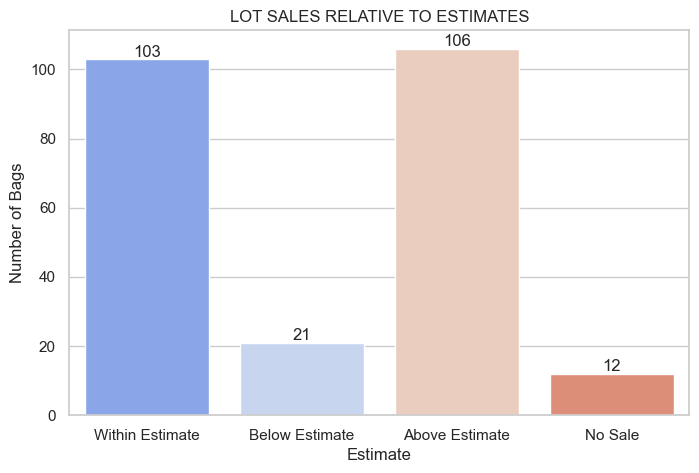

In [521]:
### b - Auction Performance: LOT SALES RELATIVE TO ESTIMATES

# CCREATE TABLE 
# Query to get Price Category counts (same logic as the plot)
query = """
    SELECT 
        `Price Category`, 
        COUNT(*) AS "Number of Bags" 
    FROM ChristiesHK_Mar25
    GROUP BY `Price Category`
    ORDER BY `Price Category`
"""
price_category_table = pd.read_sql(query, conn)

#SAVE THE TABLE IN THE DATABASE
price_category_table.to_sql(
    "Price_Category_Estimates",  # Table name
    conn,
    if_exists="replace",     # Overwrite if table exists
    index=False              # Don't save the index as a column
)

# Display the table
print("Price Category Estimates Table:")
print(price_category_table)

# PLOT THE BAR CHART
# Use Matplotlib and Seaborn PLOT SALES RELATIVE TO ESTIMATES bar chart
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='Price Category', palette='coolwarm')

plt.title("LOT SALES RELATIVE TO ESTIMATES") # add title
plt.ylabel("Number of Bags") # add labels
plt.xlabel("Estimate")

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Display chart
plt.show()


#### c- MATPLOTLIB SEABORN BarChart 2: TOP 10 SALES : DF : Top10Sales

In [522]:
# Querry the database and form the table for the top 10 sales

cursor = conn.cursor()

# Create or replace the Top10Sales table
cursor.execute("""
    DROP TABLE IF EXISTS Top10Sales;
""")

cursor.execute("""
    CREATE TABLE Top10Sales AS
    SELECT 
        Brand, 
        Description, 
        [Price Realized (USD)],
        Brand || ' — ' || Description AS [Bag Label]
    FROM ChristiesHK_Mar25
    ORDER BY [Price Realized (USD)] DESC
    LIMIT 10;
""")
conn.commit()


/var/folders/1m/7n3mw1wj3ml7gf8rmsjswdrr0000gn/T/ipykernel_2031/3581841234.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




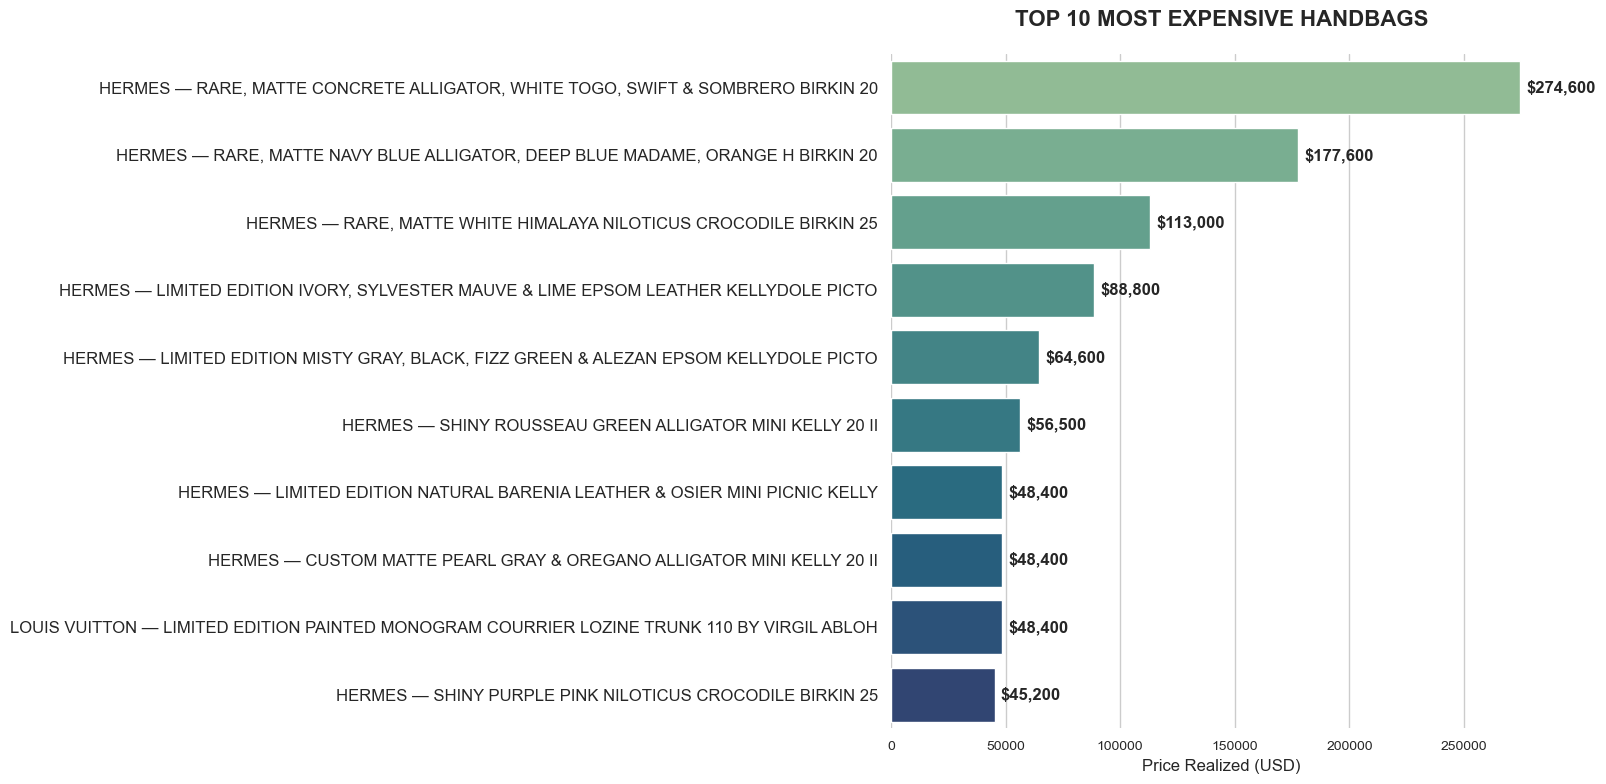

In [523]:
# LOAD DATA FOR VISUALIZATION
top_10_sales = pd.read_sql("SELECT * FROM Top10Sales", conn)

# CREATE THE BAR CHART
plt.figure(figsize=(16, 8))
sns.set_theme(style="whitegrid")

# Create horizontal bar plot
ax = sns.barplot(
    data=top_10_sales,
    y='Bag Label',
    x='Price Realized (USD)',
    palette='crest',
    saturation=0.8
)

# Add dollar amounts at the end of each bar
max_price = top_10_sales['Price Realized (USD)'].max()
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.01 * max_price,          # x-position (slightly right of bar)
            p.get_y() + p.get_height() / 2,    # y-position (middle of bar)
            f'${width:,.0f}',                  # Formatted text
            ha='left', 
            va='center', 
            fontsize=12,
            fontweight='bold')

# Customize the plot
plt.title("TOP 10 MOST EXPENSIVE HANDBAGS", pad=20, fontsize=16, fontweight='bold')
plt.xlabel("Price Realized (USD)", fontsize=12)
plt.ylabel("")  # Remove 'Lot' label as Bag Label is self-explanatory
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)

# Remove spines for cleaner look
sns.despine(left=True, bottom=True)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

### VISUALIZATIONS 2 : General Sale Results by BRAND 
a - PLOTLY Barchart 1: TOTAL SALES BY BRAND : DF : brand_sale_total \
b - ALTAIR Barchart 2: AVERAGE SALES BY BRAND : DF : Brand_Average_Prices

#### a- Plotly library to visualize the TOTAL SALES BY BRAND

In [550]:
# a- Using Plotly to viualize the TOTAL SALES BY BRAND

# CREATING TABLE
# Read data from the database table
df = pd.read_sql("SELECT * FROM ChristiesHK_Mar25", conn)
# Calculate sum of sales per brand
brand_sale_total = df.groupby("Brand")["Price Realized (USD)"].sum().reset_index()


# SAVING TABLE
# Save the brand_sale_total dataframe to the database
brand_sale_total.to_sql("Brand_Sale_Total", conn, if_exists="replace", index=False)
brand_sale_total

,Brand,Price Realized (USD)
0,CHANEL,82400
1,HERMES,3400600
2,LOUIS VUITTON,74200


In [551]:
# PLOTTING the TOTAL SALES BY BRAND CHART
# Create an interactive bar chart
fig = px.bar(
    brand_sale_total, 
    x="Brand", 
    y="Price Realized (USD)", 
    text="Price Realized (USD)", 
    title="TOTAL SALES BY BRAND",
    labels={"Price Realized (USD)": "Total Sales (USD)"},
    color="Brand",
)
# Customize layout
fig.update_traces(
    texttemplate='$%{text:,.2f}',  # Format as currency with commas
    textposition='outside'
)
fig.update_layout(
    xaxis_tickangle=0, 
    yaxis_title="Total Sales (USD)", 
    xaxis_title="Brand",
    yaxis_range=[0, 4000000],  # Set y-axis range from 0 to 4 million
    # Optional: Format y-axis ticks as dollar amounts
    yaxis_tickprefix="$",
    yaxis_tickformat=",",  # Adds comma separators
)

# Show the interactive chart
fig.show()

#### b- Altair library to visualize the AVERAGE PRICE BY BRAND

In [552]:
#c- Using Altair to viualize the AVERAGE PRICE BY BRAND

# CREATE A DATAFRAME FOR AVERAGE PRICE PER BRAND 
# 1. Calculate average prices directly in SQL
query = """
SELECT 
    Brand,
    AVG(CAST(`Price Realized (USD)` AS REAL)) as `Average_Price_USD`
FROM 
    ChristiesHK_Mar25
WHERE
    `Price Realized (USD)` != ''  -- Exclude empty values
GROUP BY 
    Brand
ORDER BY
    `Average_Price_USD` DESC
"""
# 2. Execute query and load results
brand_avg = pd.read_sql(query, conn)


# SAVE TABLE INTO DATABASE 
# 3. Save the aggregated data back to the database as a new table
brand_avg.to_sql(
    "Brand_Average_Prices", 
    conn, 
    if_exists="replace", 
    index=False
)
print("Average price per brand")
brand_avg


# CREATE VISUALIZATION
# 4 Create visualization
chart = alt.Chart(brand_avg).mark_bar().encode(
    x=alt.X('Brand:N', sort='-y', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('Average_Price_USD:Q', title='Average Price (USD)'),
    tooltip=['Brand', 'Average_Price_USD']
).properties(
    title='Average Price Per Brand Item',
    width=600,
    height=400
)
# Display results
chart.display()

Average price per brand


/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.



alt.Chart(...)

## VISUALIZATIONS 3
a- Plot Chart 1 : average price realized of brands based on year 

### a- Average price realized of brands based on year 

In [553]:
# ANALYZE AVERAGE PRICES BY BRAND AND YEAR
# SQL query to calculate average price by brand and year
query = """
SELECT 
    Brand,
    Year,
    ROUND(AVG("Price Realized (USD)"), 2) AS Average_Price_USD,
    COUNT(*) AS Item_Count,
    MIN("Price Realized (USD)") AS Min_Price_USD,
    MAX("Price Realized (USD)") AS Max_Price_USD
FROM ChristiesHK_Mar25
WHERE Brand IS NOT NULL AND Year IS NOT NULL
GROUP BY Brand, Year
ORDER BY Brand, Year
"""
# Execute query and load results into DataFrame
brand_year_stats = pd.read_sql(query, conn)

# SAVE RESULTS TO DATABASE
# Create a new table with brand/year statistics
brand_year_stats.to_sql(
    'Brand_Year_Price_Stats',  # Table name
    conn,
    if_exists='replace',      # Overwrite if exists
    index=False,             # Don't save index
    dtype={
        'Brand': 'TEXT',
        'Year': 'INTEGER',
        'Average_Price_USD': 'REAL',
        'Item_Count': 'INTEGER',
        'Min_Price_USD': 'REAL',
        'Max_Price_USD': 'REAL'
    }
)
pd.read_sql("SELECT * FROM Brand_Year_Price_Stats LIMIT 5", conn)


,Brand,Year,Average_Price_USD,Item_Count,Min_Price_USD,Max_Price_USD
0,CHANEL,1989,2600.00,1,2600.0,2600.0
1,CHANEL,1996,1500.00,1,1500.0,1500.0
2,CHANEL,1997,1900.00,1,1900.0,1900.0
3,CHANEL,2006,1466.67,3,1100.0,2100.0
4,CHANEL,2008,1550.00,2,1300.0,1800.0


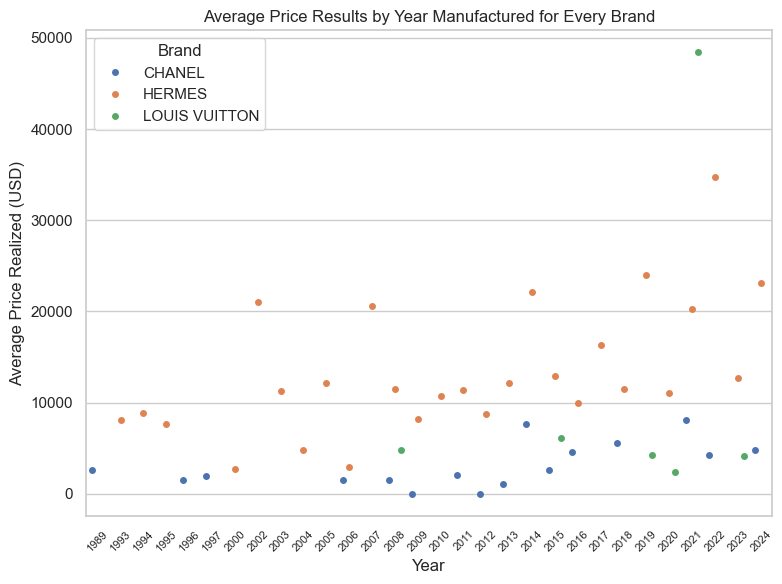

In [ ]:
### Plotting from the average price realized of brands based on year 

# Plotting the dot chart
plt.figure(figsize=(8, 6))
sns.stripplot(data= brand_year_stats, x='Year', y='Average_Price_USD', hue='Brand', dodge=True)
plt.xticks(rotation=45, fontsize=8)
plt.title("Average Price Results by Year Manufactured for Every Brand")
plt.ylabel("Average Price Realized (USD)")
plt.tight_layout()
# Display the chart
plt.show()

## VisVISUALIZATIONS 4 : Price Results by COLOR
a - PLOTLY Barchart 1: AVERAGE PRICE REALIZED BY COLOR : DF : 
b - Matplotlib Plotchart 2: PRICE REALIZED FOR EACH BAG BY BRAND BASED ON COLOR: DF : PriceByColor\
c - Matplotlib Plotchart 3: AVERAGE PRICE REALIZED BY BRAND BASED ON COLOR: DF : Brand_Color_Average_Prices

#### a - PLOTLY Barchart 1: AVERAGE PRICE REALIZED BASED ON COLOR : DF : PriceByColor      ADJUST TO SQLITE AND UPDATE DATAFRAME IN TITLE 

In [556]:
# 2. CREATE AND SAVE AVERAGE PRICE BY COLOR TABLE
# Drop table if it exists
conn.execute("DROP TABLE IF EXISTS Color_Average_Prices")
    
# Create new table with SQL aggregation
conn.execute("""
CREATE TABLE Color_Average_Prices AS
SELECT 
    Color,
    ROUND(AVG("Price Realized (USD)"), 2) AS Avg_Price_USD,
    COUNT(*) AS Item_Count
FROM ChristiesHK_Mar25
WHERE Color IS NOT NULL
GROUP BY Color
ORDER BY Avg_Price_USD DESC;
""")
conn.commit()

# 3. LOAD DATA FOR VISUALIZATION
color_avg = pd.read_sql("""
    SELECT 
        Color,
        Avg_Price_USD AS "Price Realized (USD)"
    FROM Color_Average_Prices
    ORDER BY Avg_Price_USD DESC
""", conn)


#### b - PLOTLY Barchart 1: PRICE REALIZED FOR EACH BAG BY BARAND BASED ON COLOR : DF : PriceByColor


In [564]:
### b- Create a Bar  REALIZED FOR EACH BAG BY BRAND BASED ON COLOR and save to datatbase

# CREATE THE TABLE 
# Query the required data (Brand, Color, Price Realized)
query = """
SELECT Brand, Color, "Price Realized (USD)"
FROM ChristiesHK_Mar25
WHERE "Price Realized (USD)" IS NOT NULL
"""
PriceByColor = pd.read_sql(query, conn)

# SAVE TABLE 
# Save the aggregated data back to the database as a new table
PriceByColor.to_sql(
    "PriceByColor", 
    conn, 
    if_exists="replace", 
    index=False
)
# Show Table
PriceByColor

,Brand,Color,Price Realized (USD)
0,HERMES,Green,6100
1,HERMES,Yellow,9700
2,HERMES,Yellow,12100
3,HERMES,Yellow,2300
4,HERMES,Yellow,5600
...,...,...,...
237,LOUIS VUITTON,Multi Color,4800
238,LOUIS VUITTON,Black,3500
239,LOUIS VUITTON,Black,4200
240,LOUIS VUITTON,Black,4800


In [565]:

# Plot the results using Plotly
fig = px.bar(
    PriceByColor, 
    x="Color", 
    y="Price Realized (USD)", 
    text="Price Realized (USD)", 
    title="Average Auction Price by Color (Highest to Lowest)",
    labels={"Price Realized (USD)": "Avg Price (USD)"},
    color_discrete_sequence=['#1f77b5']
)

fig.update_traces(
    texttemplate='%{text:,.2f}',
    textposition='outside',
    marker_color='#1f78b4'
)
fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_title="Avg Price (USD)",
    xaxis_title="Color",
    showlegend=False
)

fig.show()

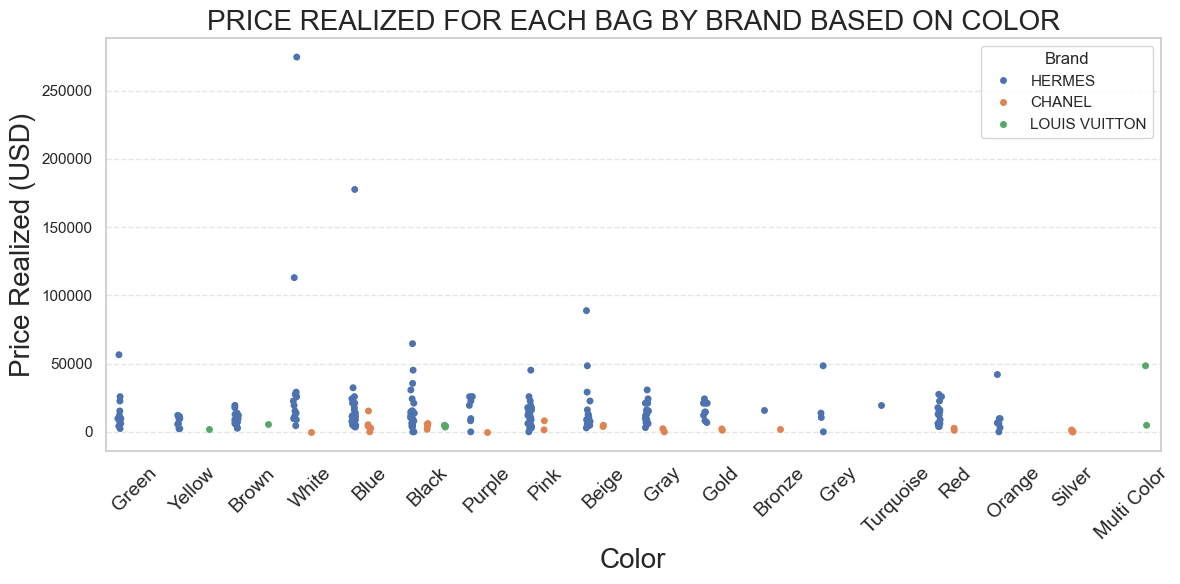

In [568]:
# PLOT THE CHART
# Generate the stripplot for REALIZED FOR EACH BAG BY BRAND BASED ON COLOR
plt.figure(figsize=(12, 6))  # Wider figure for better readability
sns.stripplot(
    data=PriceByColor,
    x='Color',
    y='Price Realized (USD)',
    hue='Brand',
    dodge=True,  # Prevents overlapping points
    palette='deep',  # Better color distinction
    alpha=1  # Slight transparency for overlapping points
)

# Format the plot
# Add title and lables
plt.title("PRICE REALIZED FOR EACH BAG BY BRAND BASED ON COLOR", fontsize=20)
plt.xlabel("Color", fontsize= 20)
plt.ylabel("Price Realized (USD)", fontsize=20)
plt.xticks(rotation=45, fontsize=14)  # Rotate x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add faint gridlines for reference
plt.tight_layout()  # Prevent label cutoff

# Display the chart
plt.show()

### c - Matplotlib Plotchart 2: AVERAGE PRICE REALIZED BY BRAND BASED ON COLOR

In [ ]:
### c- Analize Average Price Realized for Brands by Color

# GENERATE TABLE
# Calculate average prices by querying the database and save table to database
query = """
SELECT 
    Brand, 
    Color, 
    AVG(`Price Realized (USD)`) as `Average_Price_USD`
FROM 
    ChristiesHK_Mar25
GROUP BY 
    Brand, Color
"""
AveragePriceColor_df = pd.read_sql(query, conn)

# Save the Average Price Realized for Brands By Color data back to the database as a new table
AveragePriceColor_df.to_sql(
    "Brand_Color_Average_Prices", 
    conn, 
    if_exists="replace", 
    index=False
)
AveragePriceColor_df.head(10)

,Brand,Color,Average_Price_USD
0,CHANEL,Beige,4350.0
1,CHANEL,Black,4640.0
2,CHANEL,Blue,5480.0
3,CHANEL,Bronze,1800.0
4,CHANEL,Gold,1650.0
5,CHANEL,Gray,1150.0
6,CHANEL,Pink,4800.0
7,CHANEL,Purple,0.0
8,CHANEL,Red,1850.0
9,CHANEL,Silver,600.0


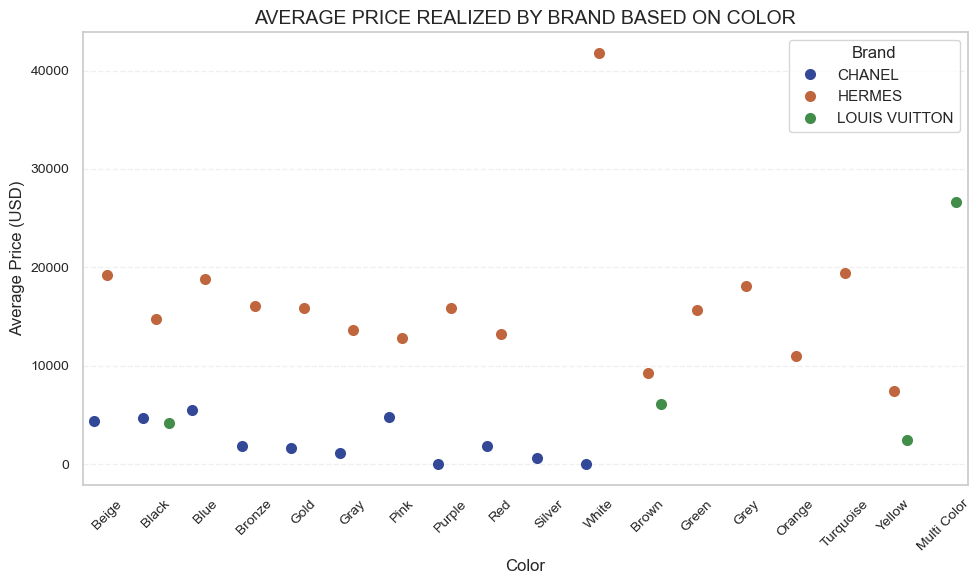

In [569]:
# PLOT CHART AVERAGE PRICE REALIZED PER BRAND BASED ON COLOR
# Generate the visualization for Average Price Realized for Brands By Color
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=AveragePriceColor_df,
    x='Color',
    y='Average_Price_USD',
    hue='Brand',
    dodge=True,
    palette='dark',
    size=8,
    alpha=0.8
)

# Formatting the table
plt.title("AVERAGE PRICE REALIZED BY BRAND BASED ON COLOR", fontsize=14) # Adding title
plt.xlabel("Color", fontsize=12) # Adding lable
plt.ylabel("Average Price (USD)", fontsize=12) # adding label
plt.xticks(rotation=45, fontsize=10) # adjusting ticks
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3) # adding and formatting grid
plt.tight_layout()

# Display the chart
plt.show()

### VISUALIZATIONS 5: Price realized by Leather
a- Plotly AVERAGE PRICE BY LEATHER TYPE : DF: Leather_Average_Prices

In [579]:
#a- Plotly AVERAGE PRICE BY LEATHER TYPE
#CREATE THE TABLE Displaying AVERAGE PRICE BY LEATHER TYPE

# SQL query to calculate average price by leather type
query = """
SELECT 
    Leather, 
    ROUND(AVG('Price Realized (USD)'), 2) AS 'Avg_Price_USD',
    COUNT(*) AS "Item_Count"
FROM ChristiesHK_Mar25
WHERE Leather IS NOT NULL
GROUP BY Leather
ORDER BY "Avg_Price_USD" DESC
"""

# Execute query and load results into DataFrame
leather_avg = pd.read_sql(query, conn)

#SAVE TABLE TO THE DATABASE
# Create a new table in the database with the results
leather_avg.to_sql(
    'Leather_Average_Prices',  # New table name
    conn,
    if_exists='replace',      # Overwrite if table exists
    index=False              # Don't save DataFrame index
)

ProgrammingError: Cannot operate on a closed database.

In [ ]:
# Plot the bar chart Representing Average Leather type by bar chart. 
# Generate the visualization
fig = px.bar(
    leather_avg,
    x="Leather",
    y="Avg_Price_USD",
    text="Avg_Price_USD",
    title="AVERAGE PRICE BY LEATHER TYPE",
    labels={
        "Avg_Price_USD": "Average Price (USD)",
        "Leather": "Leather Type"
    },
    hover_data=["Item_Count"],  # Show count of items in tooltip
    color_discrete_sequence=['#1f77b4']
)

# Customize the chart appearance
fig.update_traces(
    texttemplate='$%{text:,.2f}',
    textposition='outside',
    marker_color='#1f77b4'
)

fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_title="Average Price (USD)",
    xaxis_title="Leather Type",
    showlegend=False,
    hovermode="x unified"
)

# Display the chart
fig.show()


In [ ]:
# Close the connection to the database
conn.close()